# Plot Functional Connectivity
Based off of:
- https://seaborn.pydata.org/examples/heat_scatter.html
- https://seaborn.pydata.org/examples/many_pairwise_correlations.html

In [7]:
import glob
import os

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nilearn import plotting, datasets

## Plot Power FC (264 x 264)

In [2]:
def get_subject_from_path(path):
    normalized_path = os.path.normpath(path)
    path_components = normalized_path.split(os.sep)
    return path_components[-2][4:]

In [3]:
# Search for all functional connectivity files and read them
fc_path = '/imaging3/owenlab/bpho/python_power_fc'
fc_paths = glob.glob(fc_path + '/**/power_fc.npy', recursive=True)

fcs = {}
for path in fc_paths:
    subject_id = get_subject_from_path(path)
    fcs[subject_id] = np.load(path)
print("Number of functional connectivity:", len(fcs))
print("Number of features (connections):", fcs["NDARAP912JK3"].shape)

Number of functional connectivity: 825
Number of features (connections): (264, 264)


In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(fcs["NDARAP912JK3"], cmap=cmap, center=0,
            square=True)

In [28]:
power = datasets.fetch_coords_power_2011()
coords = np.vstack((power.rois['x'], power.rois['y'], power.rois['z'])).T

def visualize_corr_matrix(corr_matrix):
    np.fill_diagonal(corr_matrix, 0)
    plotting.plot_matrix(
        corr_matrix, vmin=-1., vmax=1., colorbar=True, figure=(10, 10),
        title='')
    plotting.plot_connectome(
        corr_matrix, coords, title='', edge_threshold='99.3%', 
        node_size=10, colorbar=True)

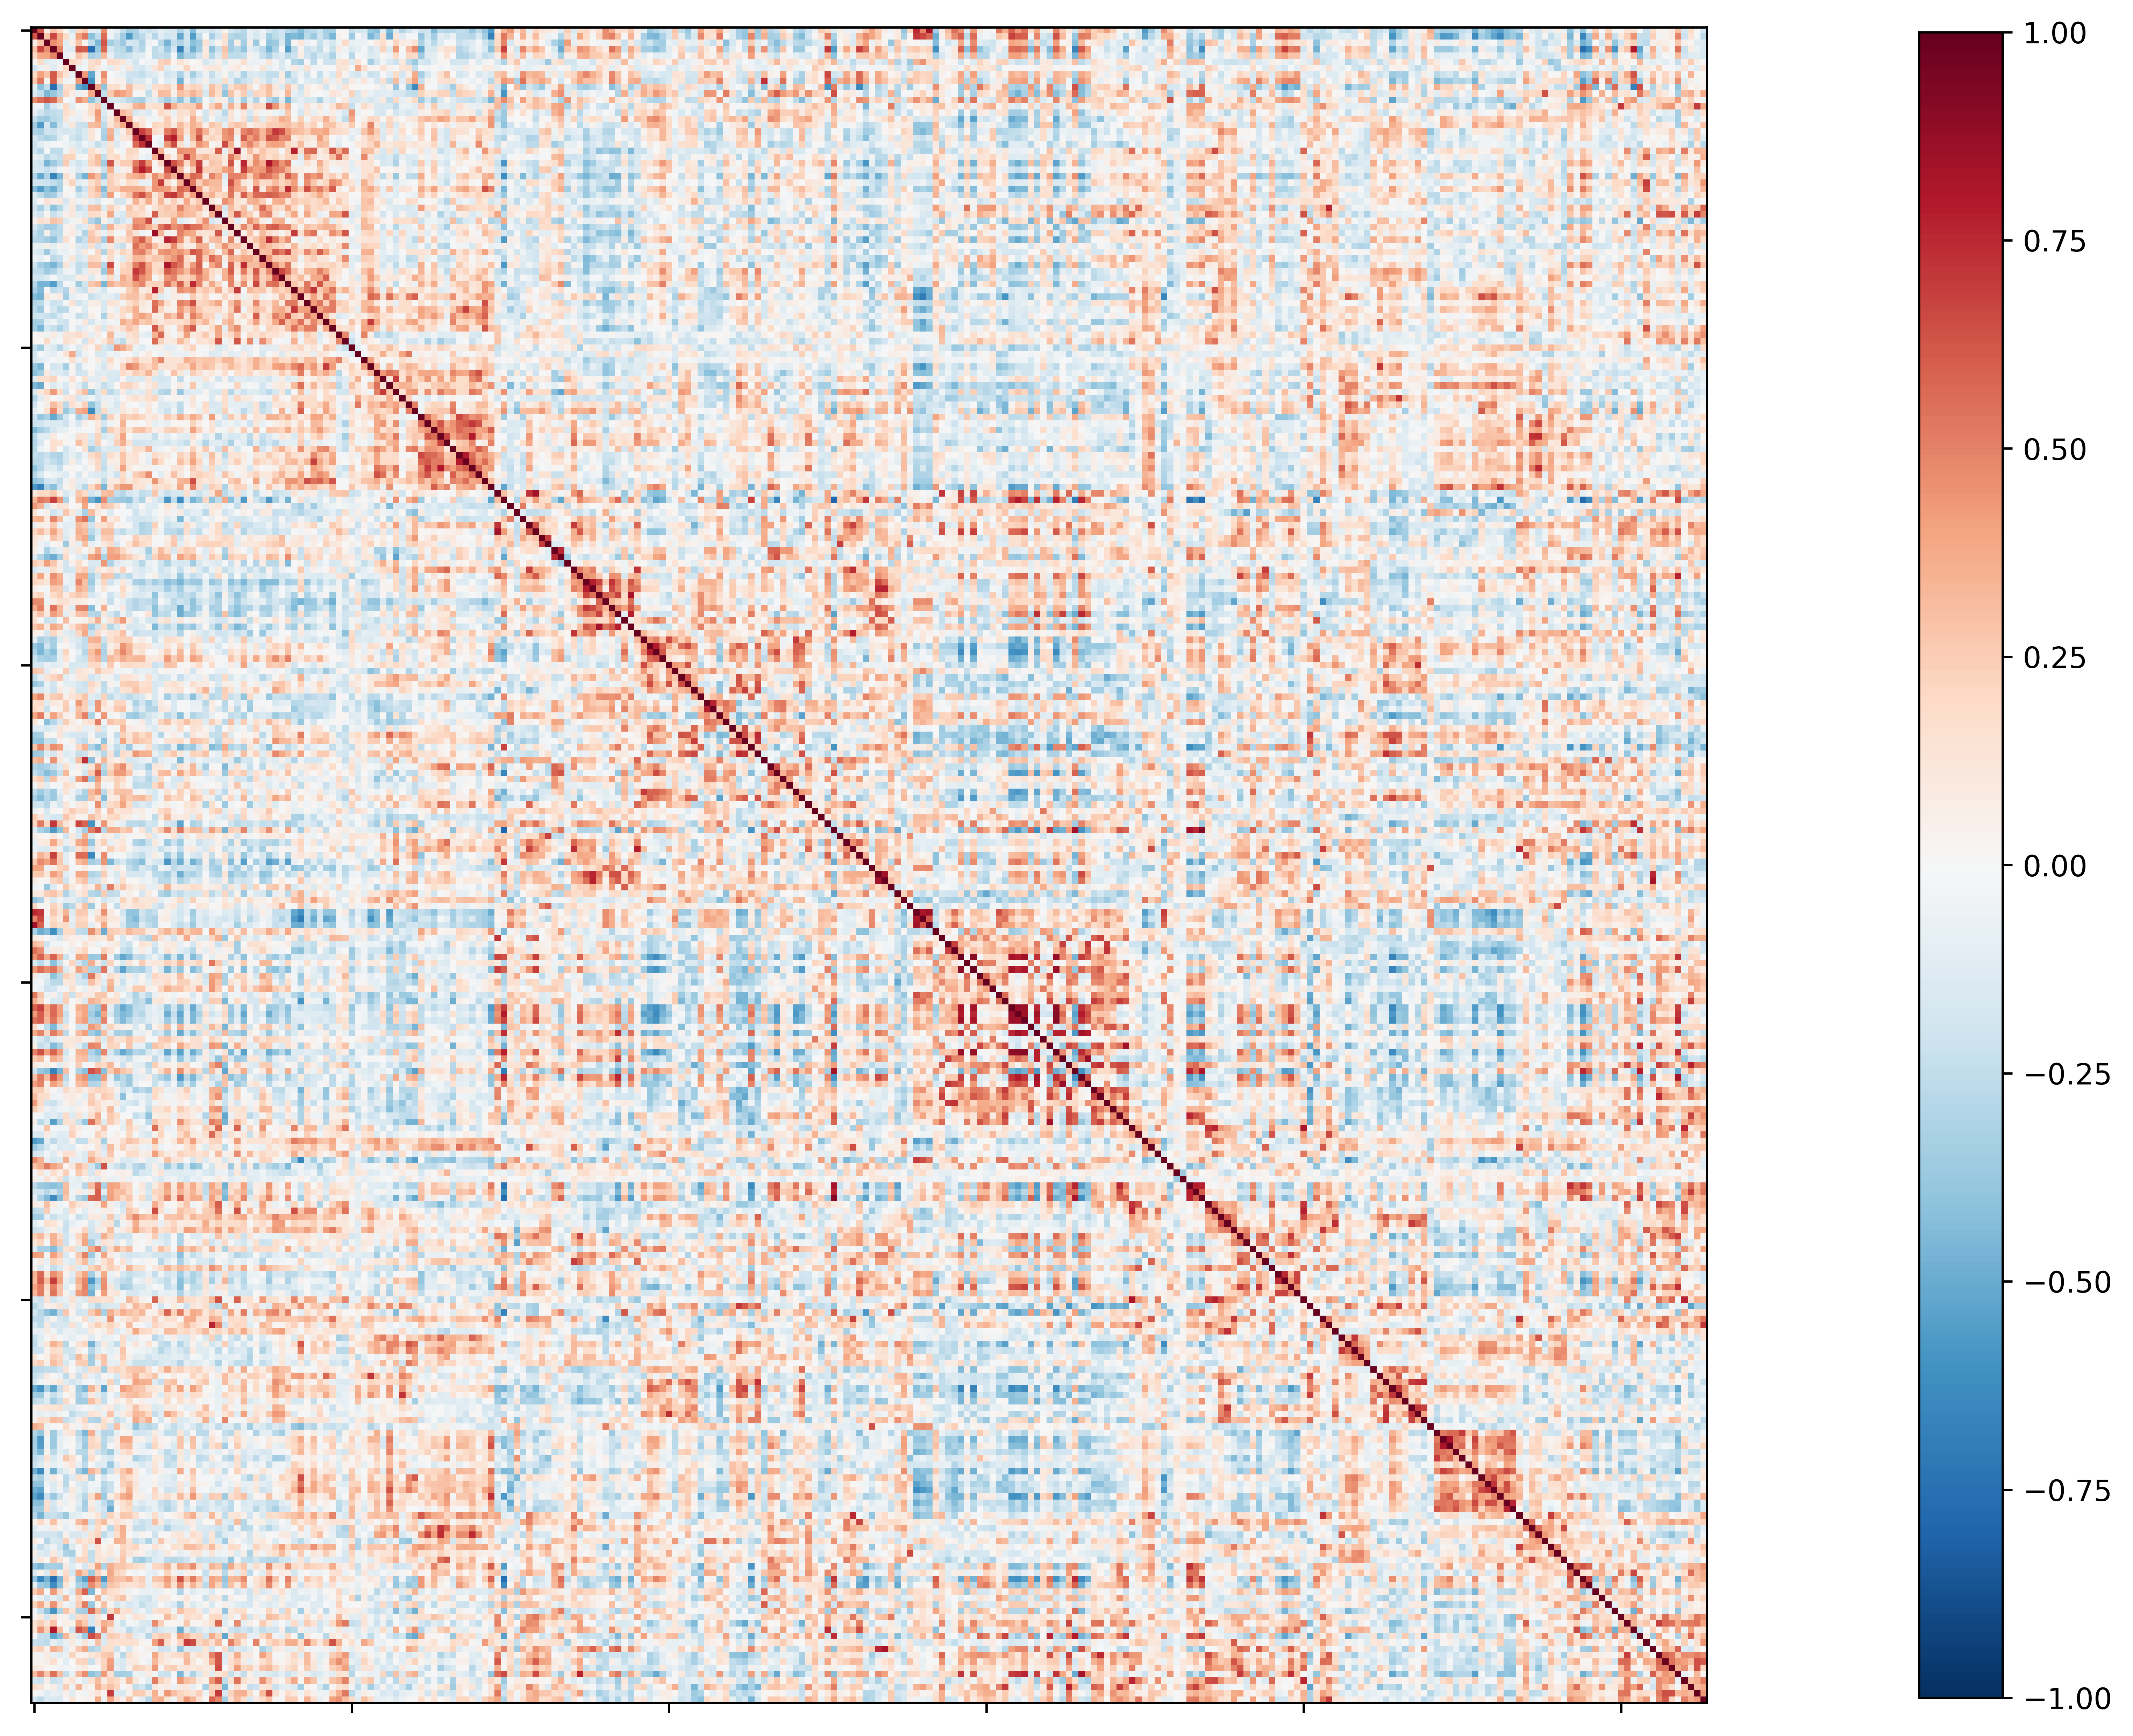

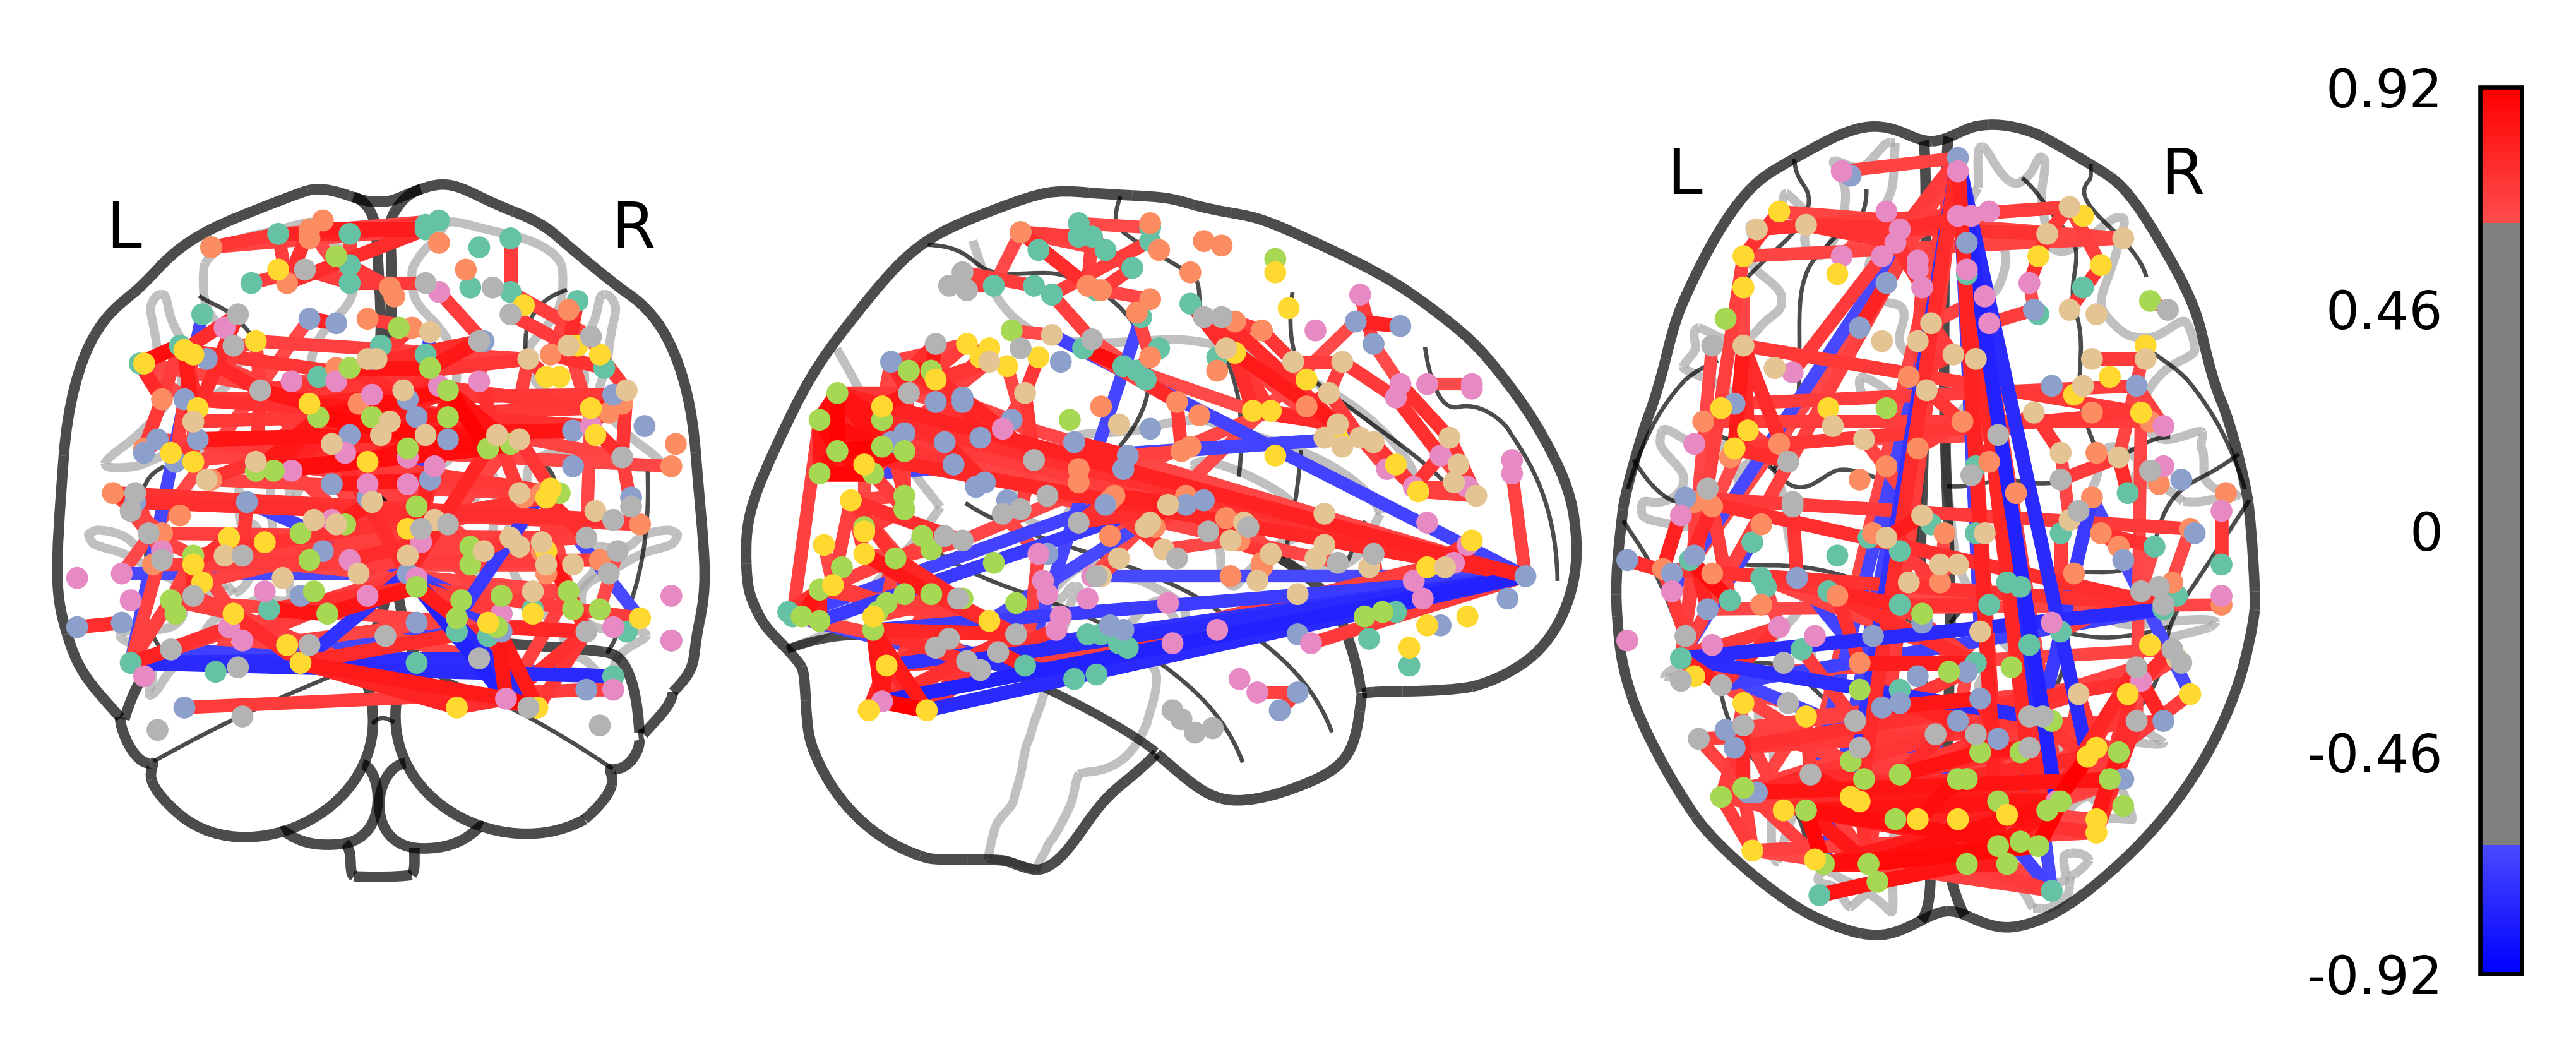

In [30]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600

visualize_corr_matrix(fcs["NDARAP912JK3"])

## Plot Yeo FC (171 x 171)

In [25]:
# Search for all functional connectivity files and read them
fc_path = '/imaging3/owenlab/bpho/python_yeo_fc'
fc_paths = glob.glob(fc_path + '/**/yeo_fc.npy', recursive=True)

fcs = {}
for path in fc_paths:
    subject_id = get_subject_from_path(path)
    fcs[subject_id] = np.load(path)
print("Number of functional connectivity:", len(fcs))
print("Number of features (connections):", fcs["NDARAP912JK3"].shape)

Number of functional connectivity: 825
Number of features (connections): (19, 19)


<AxesSubplot:>

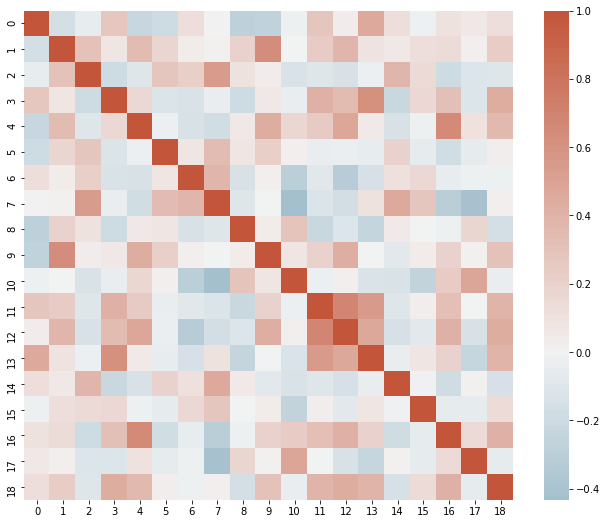

In [26]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(fcs["NDARAP912JK3"], cmap=cmap, center=0,
            square=True)

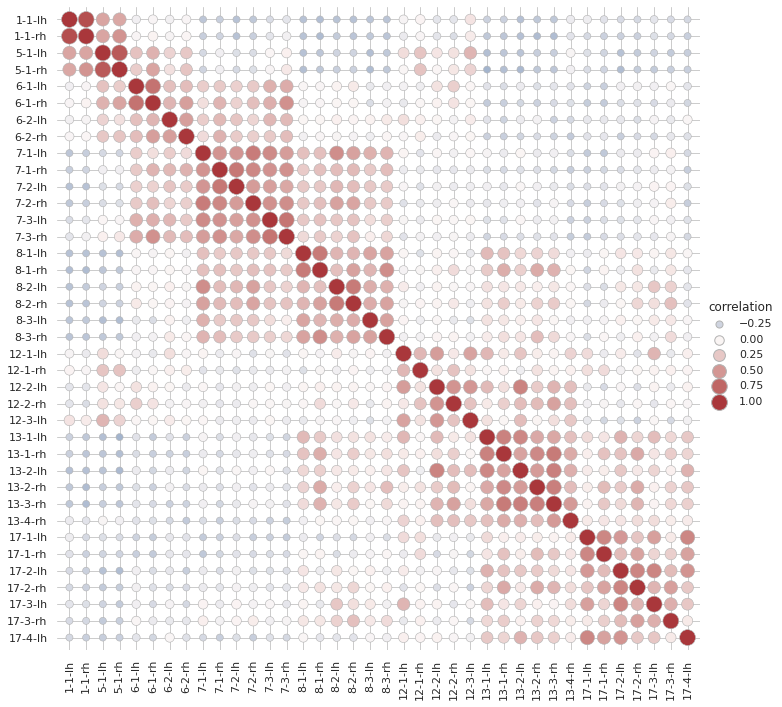

In [28]:
sns.set_theme(style="whitegrid")

# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=fcs["NDARAP912JK3"],
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

In [29]:
display(corr_mat)

,level_0,level_1,correlation
0,1-1-lh,1-1-lh,1.000000
1,1-1-lh,1-1-rh,0.881516
2,1-1-lh,5-1-lh,0.431619
3,1-1-lh,5-1-rh,0.418708
4,1-1-lh,6-1-lh,-0.084634
...,...,...,...
1439,17-4-lh,17-2-lh,0.517481
1440,17-4-lh,17-2-rh,0.256544
1441,17-4-lh,17-3-lh,0.264381
1442,17-4-lh,17-3-rh,0.090302
